<p></p>
<p style="font-size:35px;text-align:center;color:blue">Complexity and learning curve analysis for classification</p>
<p style="font-size:25px;text-align:center;color:red">(Using Lending data set)</p>
<p style="font-size:20px;text-align:center">Dr. Tirthajyoti Sarkar, Sunnyvale, CA</p>

## About this Notebook
<p style="font-size:16px;font-family:cambria">
Complexity and learning curve analyses are some of the most important tasks in a Machine Learning project.
<br><br>
<b>Learning curve</b>: Graphs that compares the performance of a model on training and testing data over a varying number of training instances. We should generally see performance improve as the number of training points increases.
<br><br>
<b>Complexity curve</b>: Graphs that show the model performance over training and validation set for varying degree of model complexity (e.g. degree of polynomial for linear regression, number of layers or neurons for neural networks, number of estimator trees for a Boosting algorithm or Random Forest). Complexity curve allows us to verify when a model has learned as much as it can about the data without fitting to the noise. The optimum learning (given the fixed data) occurs when
<ul style="font-size:16px;font-family:cambria">
<li>The performances on the training and testing sets reach a plateau</li>
<li>There is a consistent gap between the two error rates</li>
</ul>
<p style="font-size:16px;font-family:cambria">
<b>The key is to find the sweet spot that minimizes bias and variance</b> by finding the right level of model complexity. Of course with more data any model can improve, and different models may be optimal.
</p>
<p style="font-size:16px;font-family:cambria">
In this Notebook, we show classification on two separate data sets using five (5) algorithms,
<ul style="font-size:16px;font-family:cambria">
<li>Decision Tree with some pruning</li>
<li>Boosting (ensemble of Decision Trees)</li>
<li>K-Nearest neighbor</li>
<li>Support Vector Machines (SVM)</li>
<li>Multi-layer perceptron (MLP) aka feedforward/densely connected neural network</li>
</ul>

## Loan data set from lending club
<p style="font-size:16px;font-family:cambria">
This is a dataset, publicly available from <a href="https://lendingclub.com">LendingClub.com</a>. Lending Club connects people who need money (borrowers) with people who have money (investors). We try to create a model to predict the risk of lending money to someone given a wide range of credit related data. We will use lending data from 2007-2010 and be trying to classify and predict whether or not the borrower paid back their loan in full.
To get a feeling about the class separability of the data, we plot pairwise scatters and the corresponding kernel density estimates using Python seaborn package. We observe good overlap between the features i.e. they are not very easy to separate like some well-known datasets (e.g. Iris).
Here are the features description,
<ul style="font-size:16px;font-family:cambria">
<li><b>credit.policy</b>: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.</li>
<li><b>purpose</b>: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").</li>
<li><b>int.rate</b>: The interest rate of the loan, as a proportion. Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.</li>
<li><b>installment</b>: The monthly installments owed by the borrower if the loan is funded.</li>
<li><b>log.annual.inc</b>: The natural log of the self-reported annual income of the borrower.</li>
<li><b>dti</b>: The debt-to-income ratio of the borrower (amount of debt divided by annual income).</li>
<li><b>fico</b>: The FICO credit score of the borrower.</li>
<li><b>days.with.cr.line</b>: The number of days the borrower has had a credit line.</li>
<li><b>revol.bal</b>: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).</li>
<li><b>revol.util</b>: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).</li>
<li><b>inq.last.6mths</b>: The borrower's number of inquiries by creditors in the last 6 months.</li>
<li><b>delinq.2yrs</b>: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.</li>
<li><b>pub.rec</b>: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).</li>
<li><b>not.fully.paid</b>: The quantity of interest for classification - whether the borrower paid back the money in full or not</li>

## Import initial libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")

## Dataset operations

### Load the dataset

In [2]:
df=pd.read_csv("data/loan_data.csv")

### Look at first 5 rows

In [3]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


### Basic descriptive statistics

In [4]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


### One-hot encoding of categorical features

In [5]:
df_final = pd.get_dummies(df,['purpose'],drop_first=True)
df_final = df_final.drop('credit.policy',axis=1)

In [6]:
df_final.shape

(9578, 18)

## Basic visualizations
<p style="font-size:16px;font-family:cambria">
We plot histograms, boxlots and scatterplots of the dataset and observe that <b>the class separation is not very obvious</b>. Particularly, boxplots show lot of overlap between features for two output classes. 
<br><br>
So, <b>this should be a non-trivial classification task</b>.</p>

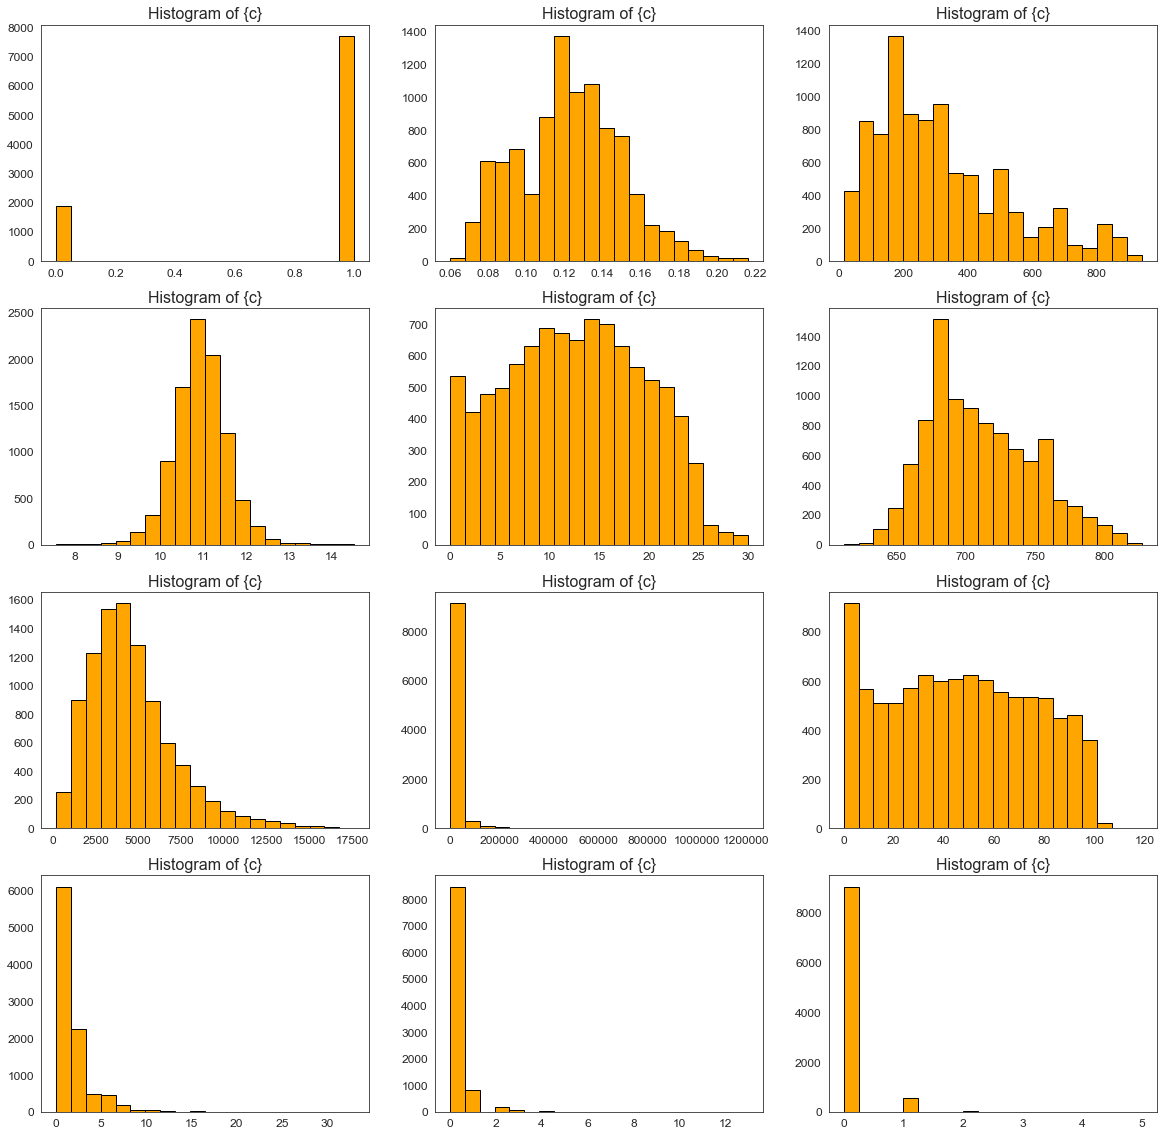

In [8]:
i=1
plt.figure(figsize=(20,20))
for c in df.describe().columns[:-1]:
    plt.subplot(4,3,i)
    plt.title("Histogram of {c}",fontsize=16)
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    plt.hist(df[c],bins=20,color='orange',edgecolor='k')
    i+=1
plt.show()

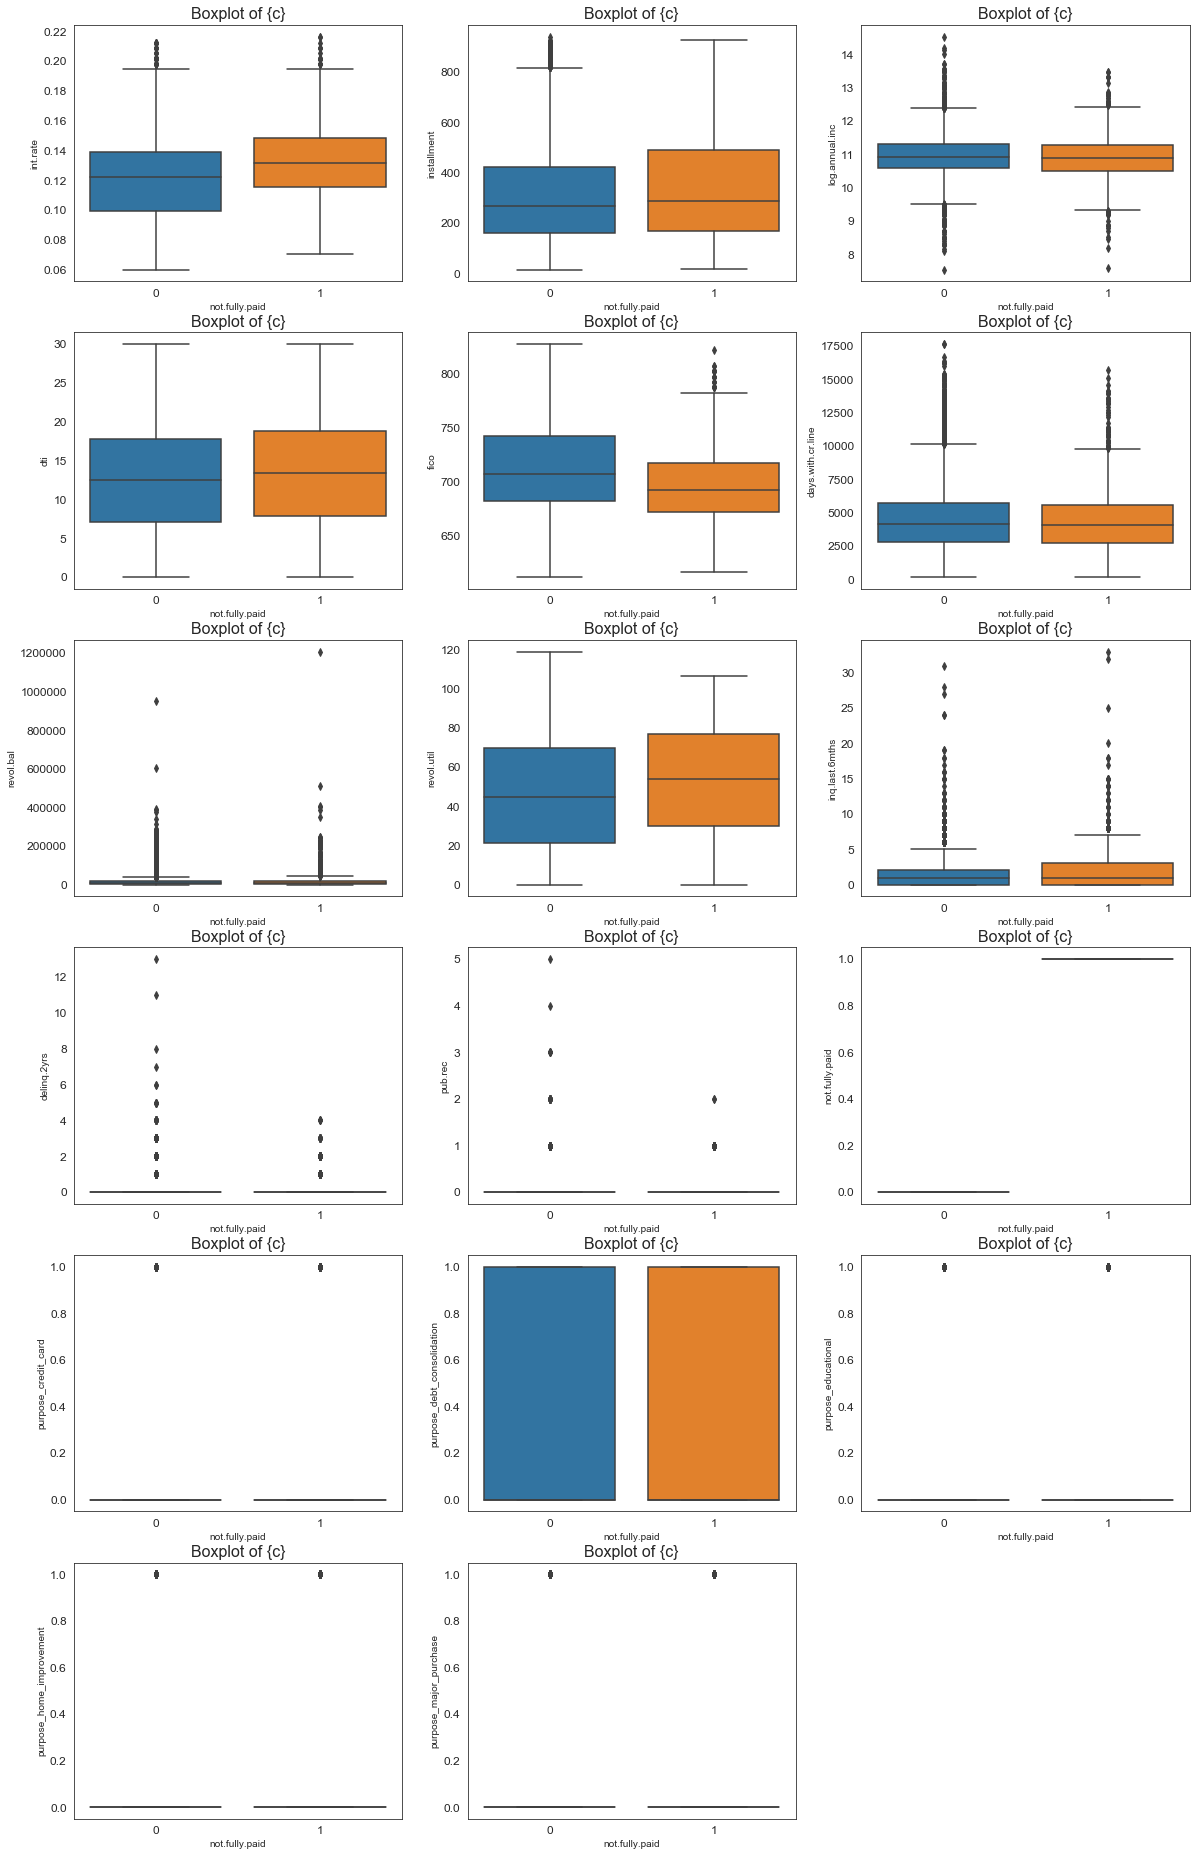

In [10]:
i=1
plt.figure(figsize=(20,33))
for c in df_final.columns[:-1]:
    plt.subplot(6,3,i)
    plt.title("Boxplot of {c}",fontsize=16)
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    sns.boxplot(y=df_final[c],x=df_final['not.fully.paid'])
    i+=1
plt.show()

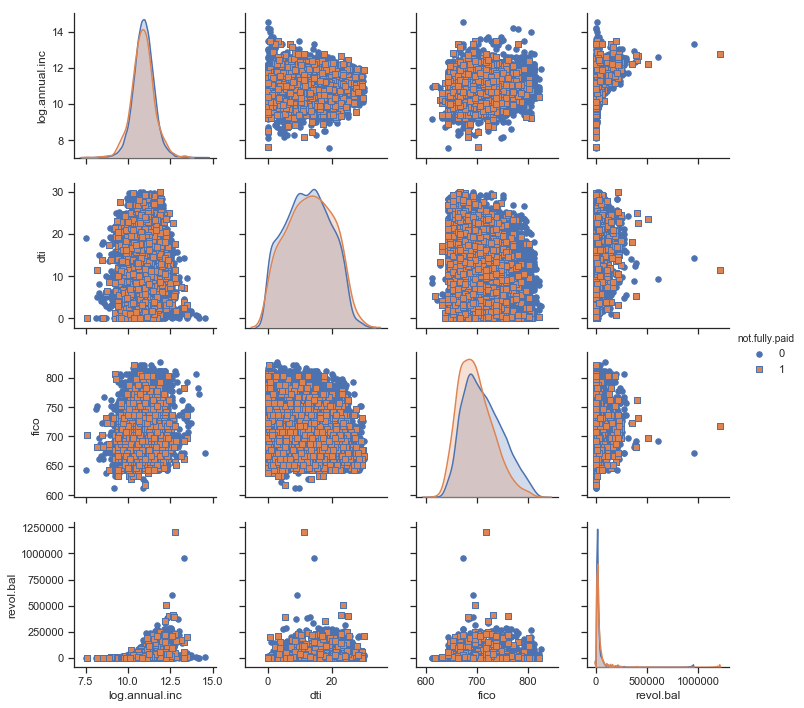

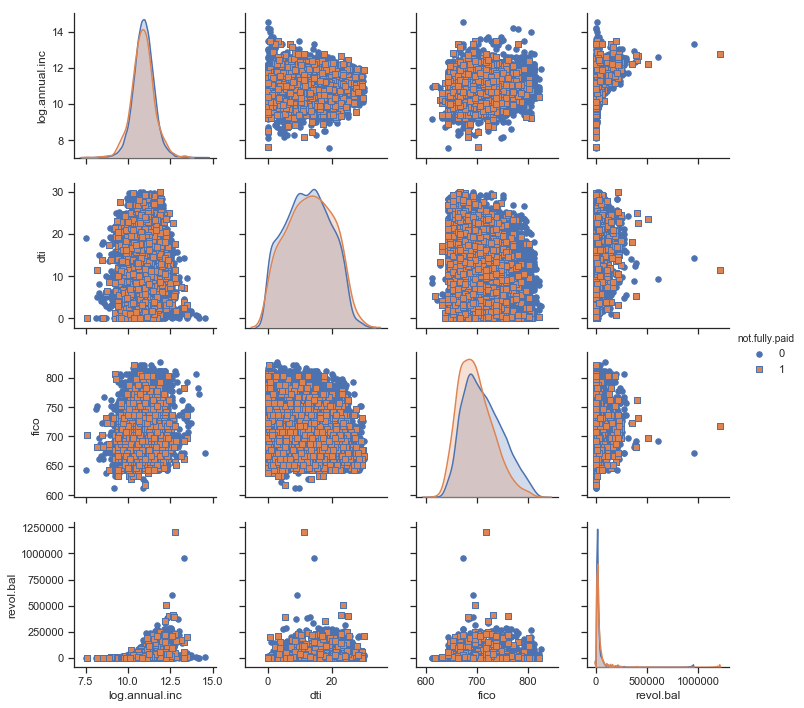

In [12]:
sns.set(style="ticks", color_codes=True)
g=sns.pairplot(df_final,vars=["log.annual.inc","dti","fico","revol.bal"],
               plot_kws=dict(s=30, edgecolor="b", linewidth=1),
               hue="not.fully.paid",markers=["o", "s"],
               diag_kind="kde",diag_kws=dict(shade=True))
plt.show()

## Test/train/validation split

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X=df_final.drop('not.fully.paid',axis=1)
y=df['not.fully.paid']

### First divide train and test data in 70:30 ratio

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [16]:
X_train.head(10)

,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
751,0.1355,407.52,11.775290,8.32,662,3060.041667,22044,81.6,0,0,0,0,0,0,0,0,0
4738,0.1426,274.45,10.308953,14.16,677,3089.958333,1338,27.9,0,0,0,0,1,0,0,0,0
2654,0.0737,372.55,10.819858,10.10,742,7769.958333,56348,33.7,0,0,0,0,0,0,0,0,0
1782,0.1695,97.98,8.342840,0.00,687,1238.041667,0,42.5,0,0,0,0,0,1,0,0,0
2836,0.0932,255.58,10.814082,14.99,762,3600.000000,1575,21.9,0,0,0,0,0,0,0,0,0
6170,0.1218,66.60,10.819778,14.83,692,2250.041667,7975,67.6,1,0,0,0,0,0,0,0,0
341,0.1204,126.29,11.050890,12.50,667,3300.000000,29736,80.2,3,0,0,0,0,0,0,0,1
8987,0.1347,376.55,10.968198,21.27,737,8069.958333,37589,72.0,7,0,0,0,0,0,0,0,1
5386,0.1565,510.80,11.482466,18.73,662,4440.041667,31485,58.6,0,0,0,0,1,0,0,0,0
4146,0.1148,659.37,11.561716,7.23,767,5400.000000,3700,51.4,2,0,0,0,1,0,0,0,0


In [17]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: not.fully.paid, dtype: int64

### Then further divide the test set in 50:50 ratio into validation set and test set

In [18]:
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.50)

In [19]:
X_test.head()

,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
2189,0.0800,313.37,11.338572,2.63,802,4320.041667,5390,10.4,0,0,0,0,0,0,0,0,1
1317,0.0737,31.05,11.256316,0.74,782,12407.000000,2440,8.6,0,0,0,0,0,0,0,0,0
6381,0.1426,548.90,11.362103,12.71,687,5264.041667,16799,74.7,1,1,0,1,0,0,0,0,0
435,0.1141,329.34,10.596635,15.93,692,3539.041667,14643,76.4,0,0,0,0,1,0,0,0,0
7400,0.1607,879.85,12.283034,14.23,747,9150.000000,59308,32.9,2,0,0,1,0,0,0,0,0


In [20]:
X_val.head()

,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
4112,0.1600,70.32,11.277203,12.58,682,3293.000000,4047,30.7,2,0,0,0,0,0,0,0,1
5837,0.0894,317.72,11.492723,15.86,747,7230.000000,32508,40.8,1,0,0,0,1,0,0,0,0
1894,0.1095,130.86,10.819778,22.46,717,5820.000000,24046,68.7,2,0,0,0,1,0,0,0,0
8281,0.1261,50.26,10.126631,1.87,657,883.041667,1140,47.5,0,0,0,1,0,0,0,0,0
194,0.0996,417.62,11.429544,6.48,712,5610.041667,2598,23.8,1,0,0,0,0,0,0,0,1


### Show the shape of these sets

In [21]:
print("Shape of validation set:", X_val.shape)
print("Shape of test set:", X_test.shape)
print("Shape of training set:", X_train.shape)

Shape of validation set: (1437, 17)
Shape of test set: (1437, 17)
Shape of training set: (6704, 17)


## Decision Tree model

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
dtree = DecisionTreeClassifier(criterion='gini',max_depth=10,min_samples_leaf=5)

In [24]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Predictions and evaluation

In [25]:
predictions = dtree.predict(X_val)

In [26]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [27]:
score1=accuracy_score(y_val,predictions)
print(score1)

0.8030619345859429


### Varying hyperparameters: _Pruning_ the tree
<p style="font-size:16px;font-family:cambria">
**Pruning** is important to increase the robustness of a decision tree classifier i.e. increase its chance of performing better with unseen test data. 
<p style="font-size:16px;font-family:cambria">
One way to prune the tree is to not let it grow indefinitely. We test this by setting the `max_depth` parameter. As expected, we see an increase in the validation set accuracy, accompanied by a decrease in training set accuracy for smaller trees. This means that for this dataset, a **deeper tree clearly overfits the data** and a shallow tree of depth 2/3 should be considered. 
<p style="font-size:16px;font-family:cambria">
Similarly, we tweak the `min_samples_leaf` parameter to limit overfitting. If we allow a single leaf per node then the algorithm will fit to the noise of the data down to a single data point (splitting data on as low as two points) thereby making the decision boundary extremely nonlinear and vulnarable to the nosie.

#### Varying *`max_depth`*

In [28]:
val_acc_max_depth=[]
val_f1_max_depth=[]
train_acc_max_depth=[]
train_f1_max_depth=[]
for i in range(3,21):
    dtree = DecisionTreeClassifier(criterion='gini',max_depth=i,min_samples_leaf=1)
    dtree.fit(X_train,y_train)
    pred_train = dtree.predict(X_train)
    pred_val = dtree.predict(X_val)
    acc_train=accuracy_score(y_train,pred_train)
    f1_train = f1_score(y_train,pred_train,average='micro')
    acc_val=accuracy_score(y_val,pred_val)
    f1_val = f1_score(y_val,pred_val,average='micro')
    train_acc_max_depth.append(acc_train)
    train_f1_max_depth.append(f1_train)
    val_acc_max_depth.append(acc_val)
    val_f1_max_depth.append(f1_val)

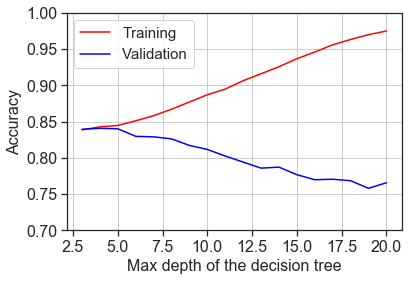

In [29]:
plt.plot(range(3,21),train_acc_max_depth,c='red')
plt.plot(range(3,21),val_acc_max_depth,c='blue')
plt.legend(["Training","Validation"],fontsize=15)
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Max depth of the decision tree", fontsize=16)
plt.ylabel("Accuracy",fontsize=16)
plt.ylim(0.7,1.0)
plt.show()

#### Varying *`min_samples_leaf`* with *`max_depth`* = 20

In [30]:
val_acc_min_samples_leaf=[]
val_f1_min_samples_leaf=[]
train_acc_min_samples_leaf=[]
train_f1_min_samples_leaf=[]
for i in range(1,41):
    dtree = DecisionTreeClassifier(criterion='gini',max_depth=20,min_samples_leaf=i)
    dtree.fit(X_train,y_train)
    pred_train = dtree.predict(X_train)
    pred_val = dtree.predict(X_val)
    acc_train=accuracy_score(y_train,pred_train)
    f1_train = f1_score(y_train,pred_train,average='micro')
    acc_val=accuracy_score(y_val,pred_val)
    f1_val = f1_score(y_val,pred_val,average='micro')
    train_acc_min_samples_leaf.append(acc_train)
    train_f1_min_samples_leaf.append(f1_train)
    val_acc_min_samples_leaf.append(acc_val)
    val_f1_min_samples_leaf.append(f1_val)

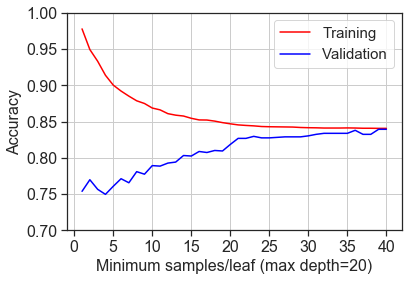

In [31]:
plt.plot(range(1,41),train_acc_min_samples_leaf,c='red')
plt.plot(range(1,41),val_acc_min_samples_leaf,c='blue')
plt.legend(["Training","Validation"],fontsize=15)
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Minimum samples/leaf (max depth=20)", fontsize=16)
plt.ylabel("Accuracy",fontsize=16)
plt.ylim(0.7,1.0)
plt.show()

### LEARNING CURVE: Varying training set size
<p style="font-size:16px;font-family:cambria">
We run a loop over a range of fractions (10% to 100%) and **sample random points up to that fraction from the original data set**. 
<p style="font-size:16px;font-family:cambria">
For each iteration, we run a decision tree model and **calculate prediction accuracy over the sampled training data and original validation set**. 
<p style="font-size:16px;font-family:cambria">
The plot shows that for this dataset and a sensible choice of hyperparameters, the accuracy is not a strong function of training data size down to small fraction of the original data. This means, in principle, **we can run the algorithm on a much smaller model than using all the data and still create decent predictions.**

In [36]:
val_acc_train_size=[]
val_f1_train_size=[]
train_acc_train_size=[]
train_f1_train_size=[]
val_range=(10,101,1)
for i in range(val_range[0],val_range[1],val_range[2]):
    # Fitting
    percentage=i*0.01
    dtree = DecisionTreeClassifier(criterion='gini',max_depth=20,min_samples_leaf=20)
    # Sampling
    df_sampled = df_final.sample(frac=percentage)
    X_train_sampled=df_sampled.drop('not.fully.paid',axis=1)
    y_train_sampled=df_sampled['not.fully.paid']
    # Fitting and Predictions
    dtree.fit(X_train_sampled,y_train_sampled)
    pred_train = dtree.predict(X_train_sampled)
    pred_val = dtree.predict(X_val)
    # Accuracy and F1 score
    acc_train=accuracy_score(y_train_sampled,pred_train)
    f1_train = f1_score(y_train_sampled,pred_train,average='micro')
    acc_val=accuracy_score(y_val,pred_val)
    f1_val = f1_score(y_val,pred_val,average='micro')
    # Appending to the lists
    train_acc_train_size.append(acc_train)
    train_f1_train_size.append(f1_train)
    val_acc_train_size.append(acc_val)
    val_f1_train_size.append(f1_val)
    if i%10==0:
        print("Done for: {} training set size".format(i))

Done for: 10 training set size
Done for: 20 training set size
Done for: 30 training set size
Done for: 40 training set size
Done for: 50 training set size
Done for: 60 training set size
Done for: 70 training set size
Done for: 80 training set size
Done for: 90 training set size
Done for: 100 training set size


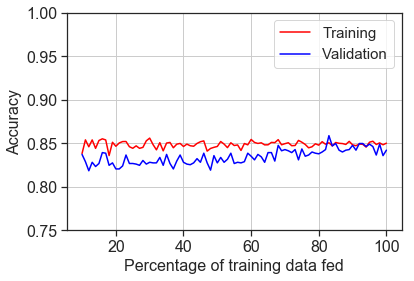

In [37]:
plt.plot(range(val_range[0],val_range[1],val_range[2]),train_acc_train_size,c='red')
plt.plot(range(val_range[0],val_range[1],val_range[2]),val_acc_train_size,c='blue')
plt.legend(["Training","Validation"],fontsize=15)
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Percentage of training data fed", fontsize=16)
plt.ylabel("Accuracy",fontsize=16)
plt.ylim(0.75,1.0)
plt.show()

## Boosting algorithm model
<p style="font-size:16px;font-family:cambria">
We use **`AdaBoost`** meta-learner. Adaboost is one of the earliest meta-learning algorithms, formulated by Yoav Freund and Robert Schapire, who won the 2003 Gödel Prize for their work.

In [38]:
from sklearn.ensemble import AdaBoostClassifier

In [39]:
adaboost=AdaBoostClassifier(DecisionTreeClassifier(min_samples_leaf=2),
                            n_estimators=20,learning_rate=0.01)

In [40]:
adaboost.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.01, n_estimators=20, random_state=None)

### Predictions and evaluation

In [41]:
predictions = adaboost.predict(X_val)

In [42]:
score1=accuracy_score(y_val,predictions)
print(score1)

0.8176757132915797


### Varying number of estimators
<p style="font-size:16px;font-family:cambria">
Adaboost works by combining multiple ‘weak learners’ and dynamically updating the weights of those learners and training data depending on whether in a given pass, those training data was correctly classified or not. Therefore, it is expected that with **increasing number of estimators, training accuracy should reach very high and the validation accuracy also should increase to the point where it hits the irreducible error rate**. 
<p style="font-size:16px;font-family:cambria">
We observe this trend in the result. Also, the biggest different between a meta-learner like Adaboost and a single decision tree is that the **validation accuracy does not drop back sharply with increase in estimators i.e. model complexity.**

In [44]:
val_acc_num_trees=[]
val_f1_num_trees=[]
train_acc_num_trees=[]
train_f1_num_trees=[]
val_range=(1,53,3)
for i in range(val_range[0],val_range[1],val_range[2]):
    # Fitting
    adaboost=AdaBoostClassifier(DecisionTreeClassifier(min_samples_leaf=20,max_depth=20),
                            n_estimators=i,learning_rate=0.2)
    adaboost.fit(X_train,y_train)
    pred_train = adaboost.predict(X_train)
    pred_val = adaboost.predict(X_val)
    # Accuracy and F1 score
    acc_train=accuracy_score(y_train,pred_train)
    f1_train = f1_score(y_train,pred_train,average='micro')
    acc_val=accuracy_score(y_val,pred_val)
    f1_val = f1_score(y_val,pred_val,average='micro')
    # Appending to the lists
    train_acc_num_trees.append(acc_train)
    train_f1_num_trees.append(f1_train)
    val_acc_num_trees.append(acc_val)
    val_f1_num_trees.append(f1_val)
    print("Done for number of trees: {}".format(i))

Done for number of trees: 1
Done for number of trees: 4
Done for number of trees: 7
Done for number of trees: 10
Done for number of trees: 13
Done for number of trees: 16
Done for number of trees: 19
Done for number of trees: 22
Done for number of trees: 25
Done for number of trees: 28
Done for number of trees: 31
Done for number of trees: 34
Done for number of trees: 37
Done for number of trees: 40
Done for number of trees: 43
Done for number of trees: 46
Done for number of trees: 49
Done for number of trees: 52


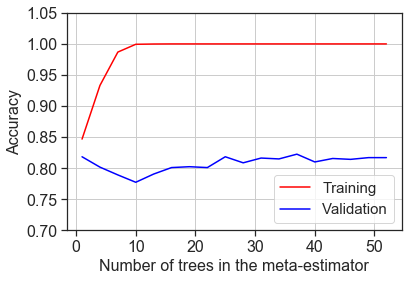

In [45]:
plt.plot(range(val_range[0],val_range[1],val_range[2]),train_acc_num_trees,c='red')
plt.plot(range(val_range[0],val_range[1],val_range[2]),val_acc_num_trees,c='blue')
plt.legend(["Training","Validation"],fontsize=15)
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Number of trees in the meta-estimator", fontsize=16)
plt.ylabel("Accuracy",fontsize=16)
plt.ylim(0.7,1.05)
plt.show()

### LEARNING CURVE: Varying training set size
<p style="font-size:16px;font-family:cambria">
The learning curve is plotted following the similar process as described above with decision tree. Training accuracy is almost 1.0 for all data set size and validation accuracy approaches training accuracy with increase in the training set size. We used 20 tree estimators for this exercise.

In [46]:
val_acc_train_size=[]
val_f1_train_size=[]
train_acc_train_size=[]
train_f1_train_size=[]
val_range=(10,101,1)
for i in range(val_range[0],val_range[1],val_range[2]):
    # Model
    percentage=i*0.01
    adaboost = AdaBoostClassifier(DecisionTreeClassifier(min_samples_leaf=20,max_depth=20),
                            n_estimators=20,learning_rate=0.2)
    # Sampling
    df_sampled = df_final.sample(frac=percentage)
    X_train_sampled=df_sampled.drop('not.fully.paid',axis=1)
    y_train_sampled=df_sampled['not.fully.paid']
    # Fitting and prediction
    adaboost.fit(X_train_sampled,y_train_sampled)
    pred_train = adaboost.predict(X_train_sampled)
    pred_val = adaboost.predict(X_val)
    # Accuracy and F1 score
    acc_train=accuracy_score(y_train_sampled,pred_train)
    f1_train = f1_score(y_train_sampled,pred_train,average='micro')
    acc_val=accuracy_score(y_val,pred_val)
    f1_val = f1_score(y_val,pred_val,average='micro')
    # Appending to the lists
    train_acc_train_size.append(acc_train)
    train_f1_train_size.append(f1_train)
    val_acc_train_size.append(acc_val)
    val_f1_train_size.append(f1_val)
    
    if i%10==0:
        print("Done for: {} training set size".format(i))

Done for: 10 training set size
Done for: 20 training set size
Done for: 30 training set size
Done for: 40 training set size
Done for: 50 training set size
Done for: 60 training set size
Done for: 70 training set size
Done for: 80 training set size
Done for: 90 training set size
Done for: 100 training set size


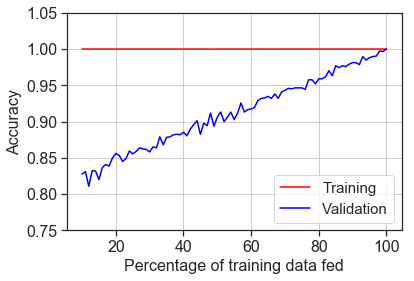

In [47]:
plt.plot(range(val_range[0],val_range[1],val_range[2]),train_acc_train_size,c='red')
plt.plot(range(val_range[0],val_range[1],val_range[2]),val_acc_train_size,c='blue')
plt.legend(["Training","Validation"],fontsize=15)
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Percentage of training data fed", fontsize=16)
plt.ylabel("Accuracy",fontsize=16)
plt.ylim(0.75,1.05)
plt.show()